# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

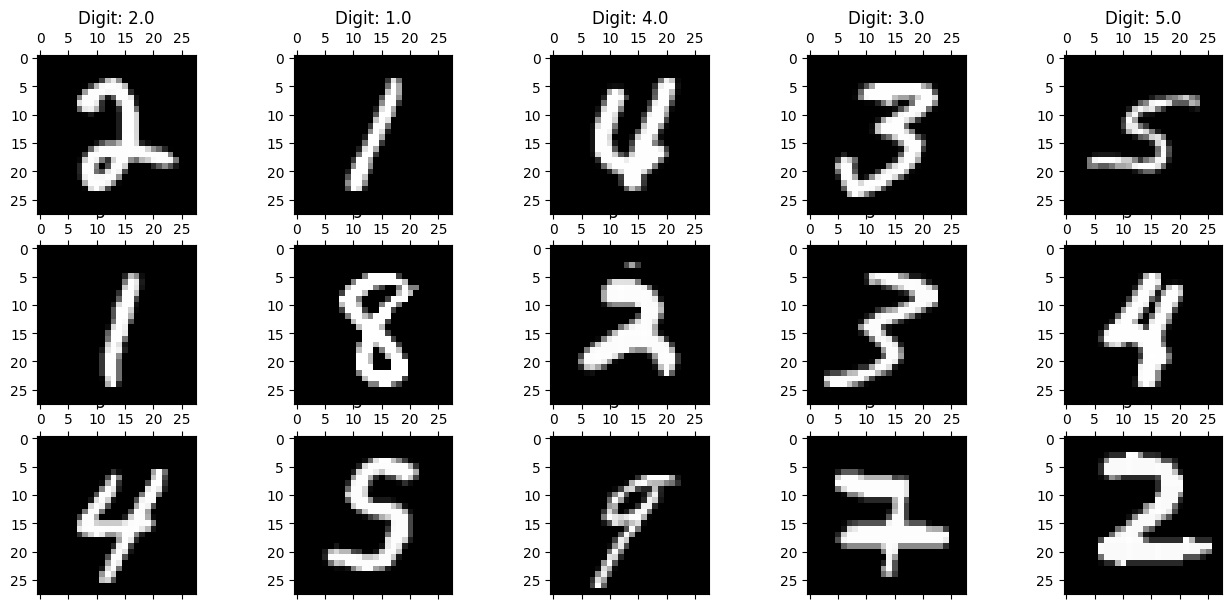

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
X = X / 255

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

# PCA

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pca_arr = pca.fit_transform(X_train)
pca_col = [f'pca{i+1}' for i in range(X_train.shape[1])]

In [11]:
result = pd.DataFrame({'explained_variance':pca.explained_variance_,
                       'explained_variance_ratio':pca.explained_variance_ratio_,
                       'cum_sum_ratio':pca.explained_variance_ratio_.cumsum()},index=pca_col)
result.head(50)

,explained_variance,explained_variance_ratio,cum_sum_ratio
pca1,5.145067,0.097568,0.097568
pca2,3.776491,0.071615,0.169183
pca3,3.239147,0.061425,0.230608
pca4,2.855460,0.054149,0.284757
pca5,2.578636,0.048900,0.333657
pca6,2.266963,0.042989,0.376646
pca7,1.732223,0.032849,0.409495
pca8,1.520176,0.028828,0.438322
pca9,1.453889,0.027571,0.465893
pca10,1.239568,0.023506,0.489399


* 고유값이 1 이상의 주성분들 : 12개
* 누적설명률이 80% 이상인 지점에서 주성분 개수 결정 : 43개

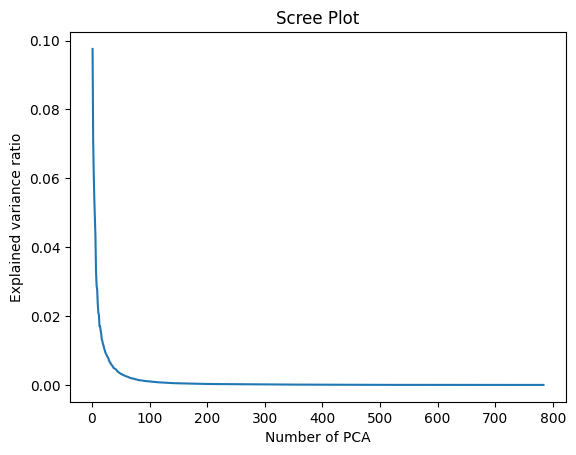

In [12]:
# PCA Scree Plot : Elbow point

plt.title('Scree Plot')
plt.plot(np.arange(1,X_train.shape[1]+1),pca.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

In [13]:
# kneed를 사용하여 Elbow point 찾기

from kneed import KneeLocator

x = np.arange(1, X_train.shape[1] + 1)
y = pca.explained_variance_ratio_
kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

print(f'Elbow Point: {elbow_point}')

Elbow Point: 50


* 곡선의 기울기가 급격히 감소하는 지점인 Elbow point를 통해 결정한 주성분 개수 : 50개

# LDA

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_arr = lda.fit_transform(X_train, y_train.flatten())
lda_col = [f'lda{i+1}' for i in range(lda_arr.shape[1])]

In [15]:
result2 = pd.DataFrame({'explained_variance_ratio':lda.explained_variance_ratio_,
                        'cum_sum_ratio':lda.explained_variance_ratio_.cumsum()},index=lda_col)
result2

,explained_variance_ratio,cum_sum_ratio
lda1,0.237081,0.237081
lda2,0.203288,0.440369
lda3,0.177983,0.618352
lda4,0.106335,0.724687
lda5,0.094156,0.818844
lda6,0.068968,0.887811
lda7,0.049905,0.937716
lda8,0.035078,0.972794
lda9,0.027206,1.000000


## 주성분 개수 최종 결정 

- 누적설명률이 80% 이상인 지점에서 주성분 개수 결정하여 PCA : 43개 / LDA : 5개

In [16]:
pca = PCA(n_components=43)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
lda = LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train.flatten())
X_test_lda = lda.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

## 1) Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

##### 원본 데이터

In [19]:
import time

start = time.time()
lr.fit(X_train, y_train)
end = time.time()

elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Elapsed Time: 28.1250 seconds


In [21]:
from sklearn.metrics import accuracy_score

lr_pred = lr.predict(X_test)
print(accuracy_score(lr_pred, y_test))

0.9237142857142857


##### PCA 축소 데이터

In [22]:
start = time.time()
lr.fit(X_train_pca, y_train)
end = time.time()

elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Elapsed Time: 3.7031 seconds


In [23]:
lr_pred = lr.predict(X_test_pca)
print(accuracy_score(lr_pred, y_test))

0.9055


##### LDA 축소 데이터

In [24]:
start = time.time()
lr.fit(X_train_lda, y_train)
end = time.time()

elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Elapsed Time: 1.8829 seconds


In [25]:
lr_pred = lr.predict(X_test_lda)
print(accuracy_score(lr_pred, y_test))

0.8343571428571429


### Logistic Regression 결과
- 원본 데이터 : 28.13s / 0.9237
- PCA 축소 데이터 : 3.70s / 0.9055
- LDA 축소 데이터 : 1.88s / 0.8344

해석 : 원본 데이터에서 가장 높은 정확도를 얻었으며, PCA와 LDA 축소 데이터를 사용한 결과도 여전히 좋은 성능을 보이고 있습니다. PCA는 차원을 줄이면서도 상당한 정확도를 유지하며, LDA는 매우 빠른 학습 시간과 어느 정도의 정확도를 제공하고 있습니다.

## 2) Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

##### 원본 데이터

In [27]:
start = time.time()
dtc.fit(X_train, y_train)
end = time.time()

elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Elapsed Time: 40.2587 seconds


In [28]:
dtc_pred = dtc.predict(X_test)
print(accuracy_score(dtc_pred, y_test))

0.8728571428571429


##### PCA 축소 데이터

In [29]:
start = time.time()
dtc.fit(X_train_pca, y_train)
end = time.time()

elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Elapsed Time: 26.6271 seconds


In [30]:
dtc_pred = dtc.predict(X_test_pca)
print(accuracy_score(dtc_pred, y_test))

0.8422857142857143


##### LDA 축소 데이터

In [31]:
start = time.time()
dtc.fit(X_train_lda, y_train)
end = time.time()

elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Elapsed Time: 2.2621 seconds


In [32]:
dtc_pred = dtc.predict(X_test_lda)
print(accuracy_score(dtc_pred, y_test))

0.7825


### Decision Tree 결과
- 원본 데이터 : 40.26s / 0.8729
- PCA 축소 데이터 : 26.63s / 0.8423
- LDA 축소 데이터 : 2.26s / 0.7825

해석 : 원본 데이터에서 가장 높은 정확도를 얻었으며, PCA와 LDA 축소 데이터를 사용한 결과도 여전히 어느 정도의 정확도를 유지하고 있습니다. 원본 데이터에서 학습 시간이 길지만 상대적으로 높은 정확도를 가진 반면, 축소된 데이터는 학습 시간이 짧지만 일부 정보 손실로 인해 정확도가 낮아졌음을 확인할 수 있었습니다. 

## 3) K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

##### 원본 데이터

In [34]:
start = time.time()
knc.fit(X_train, y_train)
end = time.time()

elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Elapsed Time: 0.0748 seconds


In [35]:
knc_pred = knc.predict(X_test)
print(accuracy_score(knc_pred, y_test))

0.9717142857142858


##### PCA 축소 데이터

In [36]:
start = time.time()
knc.fit(X_train_pca, y_train)
end = time.time()

elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Elapsed Time: 0.0253 seconds


In [37]:
knc_pred = knc.predict(X_test_pca)
print(accuracy_score(knc_pred, y_test))

0.9767857142857143


##### LDA 축소 데이터

In [38]:
start = time.time()
knc.fit(X_train_lda, y_train)
end = time.time()

elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

Elapsed Time: 0.2139 seconds


In [39]:
knc_pred = knc.predict(X_test_lda)
print(accuracy_score(knc_pred, y_test))

0.8377857142857142


### K-Nearest Neighbors 결과
- 원본 데이터 : 0.07s / 0.9717
- PCA 축소 데이터 : 0.03s / 0.9768
- LDA 축소 데이터 : 0.21s / 0.8378

해석 : 원본 데이터에서도 높은 정확도를 얻었으며, 축소된 데이터를 사용한 경우에도 어느 정도 높은 정확도를 유지하고 있습니다. 특히 PCA 축소 데이터의 경우, 학습 시간을 크게 단축시키면서 정확도를 높였음을 볼 수 있습니다.